In [15]:
!pip install music21

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.8/22.8 MB 337.2 kB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 531.1 kB/s eta 0:00:00 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 654.8 kB/s eta 0:00:001m829.1 kB/s eta 0:00:01


In [59]:
from music21 import converter,instrument,note,chord,stream
def read_midi(file):
    
    print("Loading Music File:",file)
    
    notes=[]
    notes_to_parse = None
    
    #parsing a midi file
    midi = converter.parse(file)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)

    #Looping over all the instruments
    for part in s2.parts:
    
        #select elements of only piano
        if 'Piano' in str(part): 
        
            notes_to_parse = part.recurse() 
      
            #finding whether a particular element is note or a chord
            for element in notes_to_parse:
                
                #note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                
                #chord
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

In [25]:
import os

#Array Processing
import numpy as np

#specify the path
path='../Downloads/Classical/midi_songs/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file
notes_array = np.array([read_midi(path+i) for i in files])

Loading Music File: ../Downloads/Classical/midi_songs/electric_de_chocobo.mid
Loading Music File: ../Downloads/Classical/midi_songs/Ff4-BattleLust.mid
Loading Music File: ../Downloads/Classical/midi_songs/thenightmarebegins.mid
Loading Music File: ../Downloads/Classical/midi_songs/Final_Fantasy_7_-_Judgement_Day_Piano.mid
Loading Music File: ../Downloads/Classical/midi_songs/dayafter.mid
Loading Music File: ../Downloads/Classical/midi_songs/Cids.mid
Loading Music File: ../Downloads/Classical/midi_songs/thoughts.mid
Loading Music File: ../Downloads/Classical/midi_songs/sandy.mid
Loading Music File: ../Downloads/Classical/midi_songs/HighwindTakestotheSkies.mid
Loading Music File: ../Downloads/Classical/midi_songs/traitor.mid
Loading Music File: ../Downloads/Classical/midi_songs/balamb.mid
Loading Music File: ../Downloads/Classical/midi_songs/Life_Stream.mid
Loading Music File: ../Downloads/Classical/midi_songs/path_of_repentance.mid
Loading Music File: ../Downloads/Classical/midi_songs/f

/home/vaishnavi/anaconda3/lib/python3.10/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=6, channel=None, data=b'Pok\xe9mon: Elite Four (Piano)'>; getting generic Instrument
  warnings.warn(


Loading Music File: ../Downloads/Classical/midi_songs/cosmo.mid
Loading Music File: ../Downloads/Classical/midi_songs/Finalfantasy5gilgameshp.mid
Loading Music File: ../Downloads/Classical/midi_songs/mining.mid
Loading Music File: ../Downloads/Classical/midi_songs/Final_Fantasy_Matouyas_Cave_Piano.mid
Loading Music File: ../Downloads/Classical/midi_songs/Fierce_Battle_(Piano).mid
Loading Music File: ../Downloads/Classical/midi_songs/redwings.mid
Loading Music File: ../Downloads/Classical/midi_songs/FFVII_BATTLE.mid
Loading Music File: ../Downloads/Classical/midi_songs/sera_.mid
Loading Music File: ../Downloads/Classical/midi_songs/Gold_Silver_Rival_Battle.mid
Loading Music File: ../Downloads/Classical/midi_songs/ahead_on_our_way_piano.mid
Loading Music File: ../Downloads/Classical/midi_songs/z_aeristhemepiano.mid
Loading Music File: ../Downloads/Classical/midi_songs/sobf.mid
Loading Music File: ../Downloads/Classical/midi_songs/ff4pclov.mid
Loading Music File: ../Downloads/Classical/mi

/home/vaishnavi/anaconda3/lib/python3.10/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Martin Rosok Copyright \xa9 1998'>; getting generic Instrument
  warnings.warn(


Loading Music File: ../Downloads/Classical/midi_songs/goldsaucer.mid
Loading Music File: ../Downloads/Classical/midi_songs/dontbeafraid.mid
Loading Music File: ../Downloads/Classical/midi_songs/Eternal_Harvest.mid
Loading Music File: ../Downloads/Classical/midi_songs/Oppressed.mid
Loading Music File: ../Downloads/Classical/midi_songs/FFIX_Piano.mid
Loading Music File: ../Downloads/Classical/midi_songs/fortresscondor.mid
Loading Music File: ../Downloads/Classical/midi_songs/VincentPiano.mid
Loading Music File: ../Downloads/Classical/midi_songs/ff4-fight1.mid
Loading Music File: ../Downloads/Classical/midi_songs/costadsol.mid
Loading Music File: ../Downloads/Classical/midi_songs/FF3_Third_Phase_Final_(Piano).mid
Loading Music File: ../Downloads/Classical/midi_songs/Fiend_Battle_(Piano).mid
Loading Music File: ../Downloads/Classical/midi_songs/decisive.mid
Loading Music File: ../Downloads/Classical/midi_songs/BlueStone_LastDungeon.mid
Loading Music File: ../Downloads/Classical/midi_songs/

/tmp/ipykernel_26557/3243476361.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  notes_array = np.array([read_midi(path+i) for i in files])


In [26]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

396


(array([303.,  32.,  14.,  10.,   9.,   7.,   5.,   7.,   4.,   5.]),
 array([1.0000e+00, 1.4610e+02, 2.9120e+02, 4.3630e+02, 5.8140e+02,
        7.2650e+02, 8.7160e+02, 1.0167e+03, 1.1618e+03, 1.3069e+03,
        1.4520e+03]),
 <BarContainer object of 10 artists>)

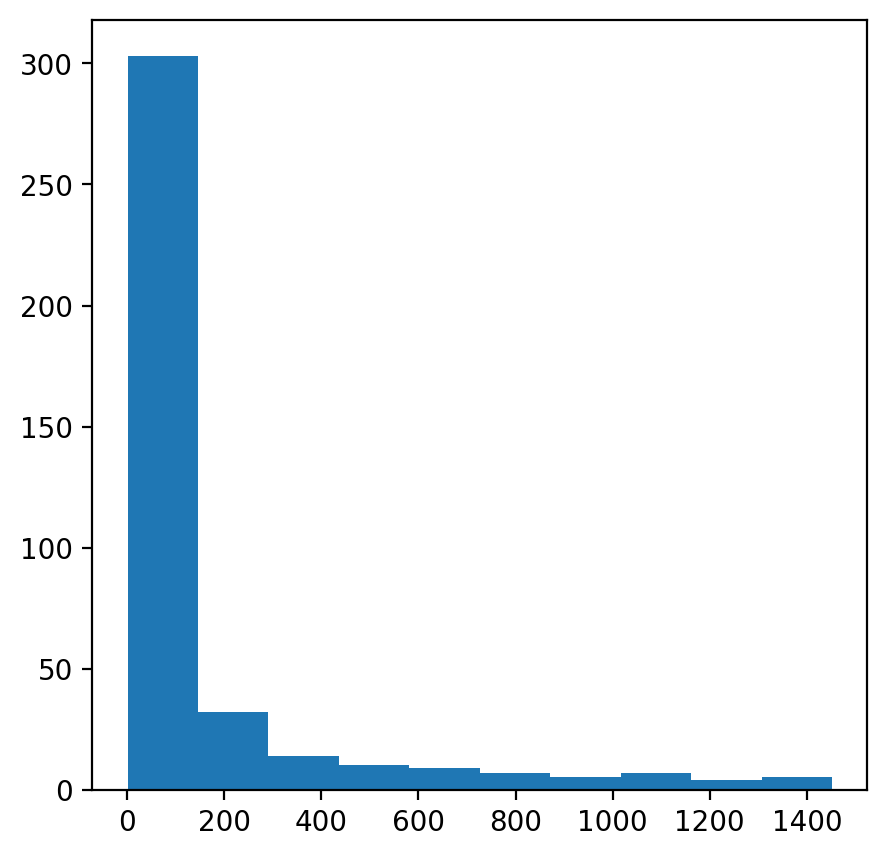

In [27]:
#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [28]:
frequent_notes = [note_ for note_, count in freq.items() if count>=50]
print(len(frequent_notes))

137


In [31]:
new_music=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)            
    new_music.append(temp)
    
new_music = np.array(new_music)

/tmp/ipykernel_26557/2871568428.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_music = np.array(new_music)


In [33]:
no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)


In [34]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))

In [43]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

In [50]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [44]:
#preparing input sequences
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)

In [39]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.7 MB/s eta 0:00:00m eta 0:00:010:00:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 5.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.0 MB/s eta 0:00:00m eta 0:00:010:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 6.4 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 7.2 MB/s eta 0:00:00m eta 0:00:010:01:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.6 MB/s eta 0:00:007.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 6.6 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 8.0 MB/s eta 0:00:000:00:01
  

  Created wheel for jax: filename=jax-0.4.13-py3-none-any.whl size=1518707 sha256=53dacf87d6dcf12684a0c46c70898b54c3ec98b82202a9a031e9b2496af0fe4e
  Stored in directory: /home/vaishnavi/.cache/pip/wheels/4c/a3/e7/ea156aff3754a8f833f1b0c9587dec0bcfc9c551c439c9dcc7
Successfully built jax


In [45]:
def lstm():
      model = Sequential()
      model.add(LSTM(128,return_sequences=True))
      model.add(LSTM(128))
      model.add(Dense(256))
      model.add(Activation('relu'))
      model.add(Dense(n_vocab))
      model.add(Activation('softmax'))
      model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
      return model

In [46]:
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K


In [47]:
K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 100)           13700     
                                                                 
 conv1d (Conv1D)             (None, 32, 64)            19264     
                                                                 
 dropout (Dropout)           (None, 32, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 128)           24704     
                                                                 
 dropout_1 (Dropout)         (None, 16, 128)           0         
                                                        

In [48]:
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)


In [51]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=50, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])


Epoch 1/50
327/330 [============================>.] - ETA: 0s - loss: 4.1539
Epoch 1: val_loss improved from inf to 3.85722, saving model to best_model.h5
330/330 [==============================] - 8s 24ms/step - loss: 4.1508 - val_loss: 3.8572
Epoch 2/50
329/330 [============================>.] - ETA: 0s - loss: 3.5986
Epoch 2: val_loss improved from 3.85722 to 3.62229, saving model to best_model.h5
330/330 [==============================] - 8s 24ms/step - loss: 3.5984 - val_loss: 3.6223
Epoch 3/50
329/330 [============================>.] - ETA: 0s - loss: 3.4078
Epoch 3: val_loss improved from 3.62229 to 3.50156, saving model to best_model.h5
330/330 [==============================] - 8s 23ms/step - loss: 3.4077 - val_loss: 3.5016
Epoch 4/50
328/330 [============================>.] - ETA: 0s - loss: 3.2871
Epoch 4: val_loss improved from 3.50156 to 3.42257, saving model to best_model.h5
330/330 [==============================] - 8s 23ms/step - loss: 3.2871 - val_loss: 3.4226
Epoch 5/

329/330 [============================>.] - ETA: 0s - loss: 2.2801
Epoch 34: val_loss improved from 2.77527 to 2.76846, saving model to best_model.h5
330/330 [==============================] - 8s 23ms/step - loss: 2.2804 - val_loss: 2.7685
Epoch 35/50
328/330 [============================>.] - ETA: 0s - loss: 2.2634
Epoch 35: val_loss improved from 2.76846 to 2.75943, saving model to best_model.h5
330/330 [==============================] - 8s 23ms/step - loss: 2.2630 - val_loss: 2.7594
Epoch 36/50
329/330 [============================>.] - ETA: 0s - loss: 2.2495
Epoch 36: val_loss improved from 2.75943 to 2.74721, saving model to best_model.h5
330/330 [==============================] - 8s 25ms/step - loss: 2.2489 - val_loss: 2.7472
Epoch 37/50
328/330 [============================>.] - ETA: 0s - loss: 2.2431
Epoch 37: val_loss improved from 2.74721 to 2.74126, saving model to best_model.h5
330/330 [==============================] - 7s 22ms/step - loss: 2.2435 - val_loss: 2.7413
Epoch 38

In [63]:
import random
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]

predictions=[]
for i in range(10):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

1/1 [==============================] - 0s 13ms/step
[55, 127, 125, 68, 125, 14, 68, 38, 14, 14]


In [64]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes = [x_int_to_note[i] for i in predictions]

In [67]:
def convert_to_midi(prediction_output):
   
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                
                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
                
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
            
        # pattern is a note
        else:
            
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='music_new.mid')

In [68]:
convert_to_midi(predicted_notes)